In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/HP/Desktop/dataset.csv")

In [3]:
df.shape

(10299, 563)

In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,WALKING_UPSTAIRS


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
y = df["Activity"]

In [5]:
X = df.drop(["subject", "Activity"], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 8)

In [8]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7209, 561),(7209,))
X_test  and y_test  : ((3090, 561),(3090,))


In [7]:
knn = KNeighborsClassifier()

In [8]:
knn_model =knn.fit(X_train, y_train)

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.955663430420712

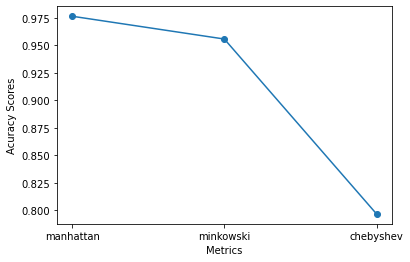

In [20]:
acc_scores = []

knn_model = KNeighborsClassifier(metric = "manhattan").fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

knn_model = KNeighborsClassifier(metric = "minkowski").fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

knn_model = KNeighborsClassifier(metric = "chebyshev").fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

metrics = ["manhattan", "minkowski", "chebyshev"]

plt.plot(metrics, acc_scores, marker = "o")
plt.xlabel('Metrics')
plt.ylabel('Acuracy Scores')
plt.show();

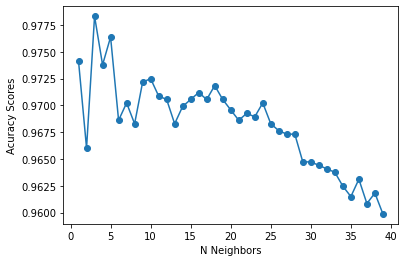

In [16]:
acc_scores = []

for n in range(1,40):
    knn_model = KNeighborsClassifier(metric = "manhattan", n_neighbors = n).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(range(1,40), acc_scores, marker = "o")
plt.xlabel('N Neighbors')
plt.ylabel('Acuracy Scores')
plt.show();

In [16]:
knn_params = {"n_neighbors" : [1,2,3,4,5],
              "weights" : ["distance", "uniform"],
              "metric" : ["manhattan"]}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10, verbose = 2)

In [21]:
knn_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  29.5s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  31.1s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  31.4s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  32.4s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  32.7s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  33.6s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  32.0s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  31.4s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  30.9s
[CV] END ..metric=manhattan, n_neighbors=1, weights=distance; total time=  37.4s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=  33.6s
[CV] END ...metric=manhattan, n_neighbors=1, w

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['distance', 'uniform']},
             verbose=2)

In [22]:
knn_cv_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [11]:
knn_tuned = KNeighborsClassifier(n_neighbors = 4, metric= 'manhattan', weights = "distance").fit(X_train, y_train)

In [12]:
y_pred = knn_tuned.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9805825242718447

In [14]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test.to_numpy(), y_pred)
cm_tree

array([[572,   0,   0,   0,   0,   1],
       [  0, 512,  37,   0,   0,   1],
       [  0,  15, 567,   0,   0,   0],
       [  0,   0,   0, 506,   0,   0],
       [  0,   0,   0,   3, 403,   1],
       [  0,   0,   0,   1,   1, 470]], dtype=int64)

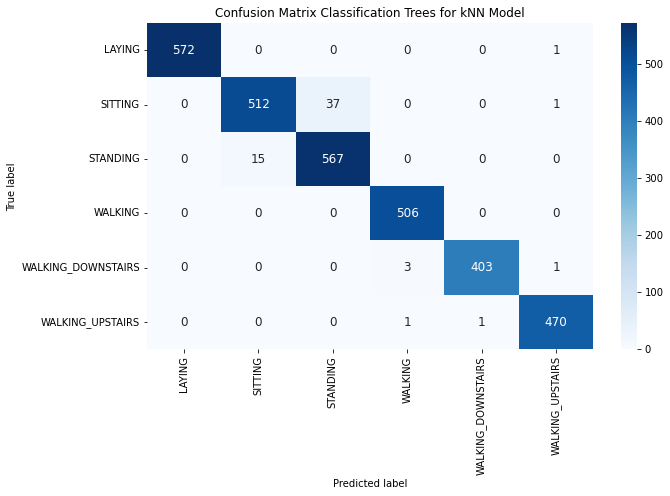

In [20]:
categories = sorted(df["Activity"].unique(), reverse=False)
df_tree = pd.DataFrame(cm_tree, index = categories, columns = categories)

plt.figure(figsize = (10,6))
sns.heatmap(df_tree, annot=True, annot_kws={"size": 12}, fmt="g", cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix Classification Trees for kNN Model")
plt.show()